In [1]:
import sys

print(sys.executable)  # 打印当前的 Python 解释器路径

import ipykernel

print(ipykernel.__file__)  # 打印当前的 ipykernel 包路径

/Users/captain/miniconda3/envs/dbscan/bin/python
/Users/captain/miniconda3/envs/dbscan/lib/python3.10/site-packages/ipykernel/__init__.py


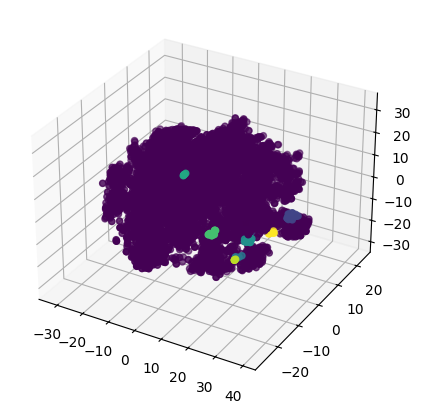

送了一个小时，饿死了
特别慢，别人比我晚点半个小时的都送到吃完了，我还等了他很久，也不好吃
速度太慢了   等了一个多小时
太慢了，难得等，等二三个小时
无语，慢到极点，那么近还一个小时才送来，饿死我了
超时一个小时才来，慢到无法想象
速度太慢了，从下单到收到，花了一个小时
慢的要死！等了一个半小时才来！早就饿死了！
太慢了，今天整整等了一个小时，人都饿死了
太慢了，等了一个多小时饿死了，

Cluster: -1
Number of comments in this cluster: 3093
Sample comments:
说实话，还真心不好吃#鸡蛋西红柿汤面#
老板很亲切，人很好。酸奶也好喝。大家多照顾生意吧
很划算，环境也干净，主要是冻柠茶非常棒
首先今天的饭应该是水放多了，口感特别差！！！然后芝士也变少了！！还有不知道是不是老板换了其它牌子的芝士完全不起丝！！跟面粉似的
一如既往的清淡好喝 不甜腻 也大杯 一般一杯一个人都喝不完

Cluster: 0
Number of comments in this cluster: 6809
Sample comments:
这个就不用多介绍啦，味道简直一级棒，偶也
一如既往的好，很喜欢吃她家的糯香掌味道粑糯，入味，很浓厚。还有米椒鲫鱼，味道也很巴士，辣得够味，还会去她家吃饭的。
点了配菜金针菇，但是至始至终没有吃到。估计老板忘放了，也没有解释下#特色烤鱼#
都非常好。分量足，味道好，环境不错。
有味道，吃感觉都馊了

Cluster: 1
Number of comments in this cluster: 10
Sample comments:
特别慢，别人比我晚点半个小时的都送到吃完了，我还等了他很久，也不好吃
无语，慢到极点，那么近还一个小时才送来，饿死我了
慢的要死！等了一个半小时才来！早就饿死了！
送了一个小时，饿死了
太慢了，今天整整等了一个小时，人都饿死了

Cluster: 2
Number of comments in this cluster: 23
Sample comments:
我尼玛吓一跳，差点把苍蝇当成蚊子吃了！！这是什么情况，太不卫生了吧，第一次喝粥里面有苍蝇这么大一只，都是老客户了，卫生能不能到位一点！！真的差....（有图有真相）
要不要这么恶心，快吃完了看到一个苍蝇，我真

In [16]:

import pandas as pd

from tsne import TSNEDisplayer
from tfidf import TfidfClz
from bert import Text2VecClz
from analysis import analysis
import numpy as np
import os

# 设置工作空间 & 读取数据
train = pd.read_csv('./train.csv', sep='\t')

filename = 'embeddings.npz'

tfidf_matrix = None
if os.path.exists(filename):
    data = np.load(filename)
    tfidf_matrix = data['embeddings']
else:
    print(f"File: {filename} does not exist!")
    tfidf_matrix = Text2VecClz().text2vec(train['comment'])
    np.savez_compressed('embeddings.npz', embeddings=tfidf_matrix)

from sklearn.preprocessing import normalize

# 归一化 tfidf_matrix, 默认使用 'l2' 范数
tfidf_matrix = normalize(tfidf_matrix)

# 进行模型训练
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.6, min_samples=5).fit(tfidf_matrix)

pd.set_option('display.max_rows', 1000)
TSNEDisplayer().show(tfidf_matrix, clustering)
analysis(train, clustering)

